## 5.1: E/ER-to-Relational Model Mapping

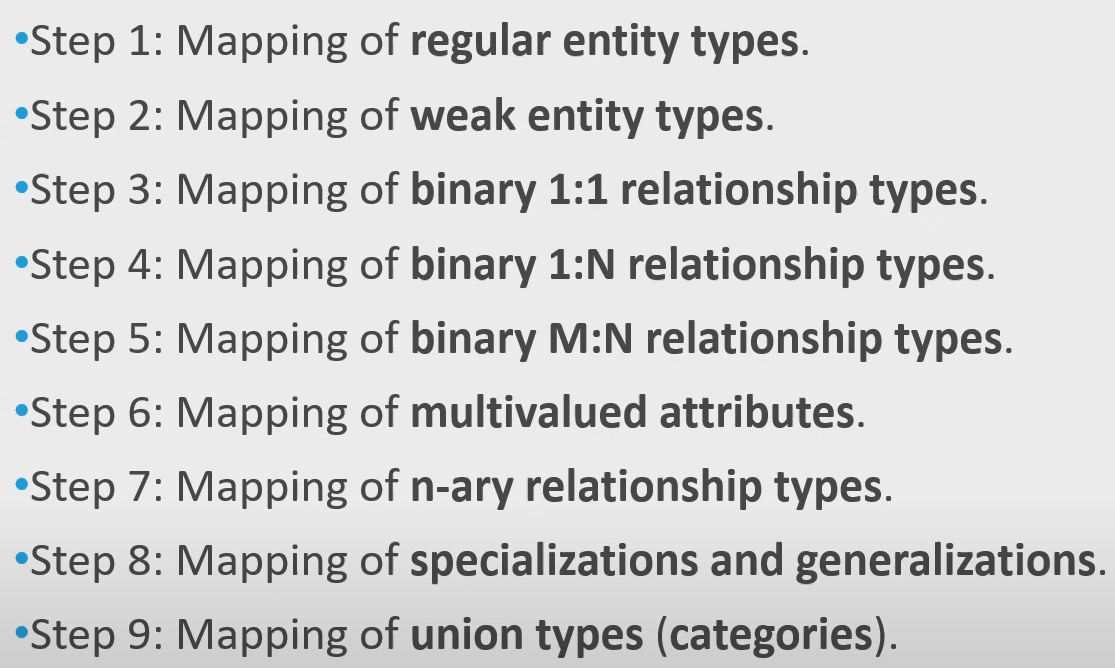

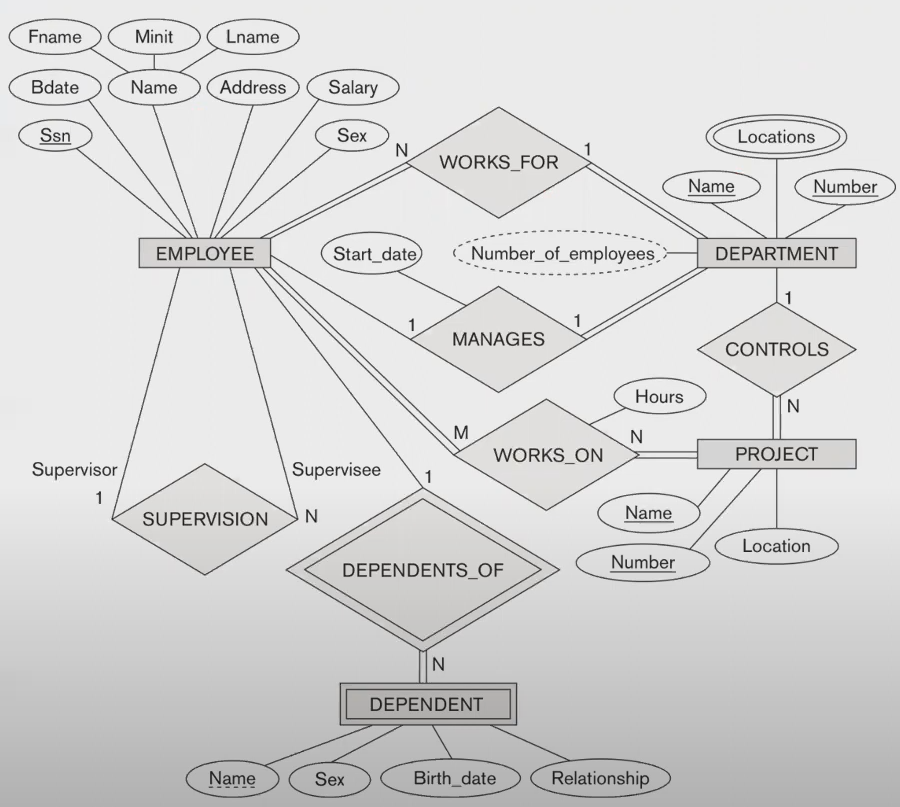

1. For the strong entities (Emplaoyee, Department, Project), we'll create relations with all the attributes, and define a primary key.
2. For the week entities (Dependent), we'll create the relation with all the attributes, and introduce a seconday key column that corresponds to the primary key of a strong relation, and define the relation type.
3. Mapping of binary 1:1 relations: a. Foreign key: include foreign key in S a primary key of T. It's better to chose an entity type with total participation in R in the role of S. b. Merge relation: merge relations if both relations are total. c. c. Cross-reference or relationship relaiton (3 relations - R, S, T): create a 3rd relation R with Primary key of two relation in case of partial participation.
4. Mapping binary 1:N relationships: for each binary 1:N relationship, many side relation is S, 1 side relation is T. Include Primary key of T in S as foreign key. Then add all attributes.
5. Binary M:N relationship type R: create a new relation S to represent R. Include primary keys of participating entities as foreign key. The combination of the foreign keys will be primary key in the new relation.
6. Mapping multivalued attributes: for each multivalued attribute, create a new relation. It'll contain the Primary key of mother relation as foreign key, and the multivalued attribute - the foreign key + attribute will be primary key.
7. Mapping n-array relationships: create a new relation; add primary keys of all related entities; add any simple attribute. The primary key will be combination of the foreign keys.

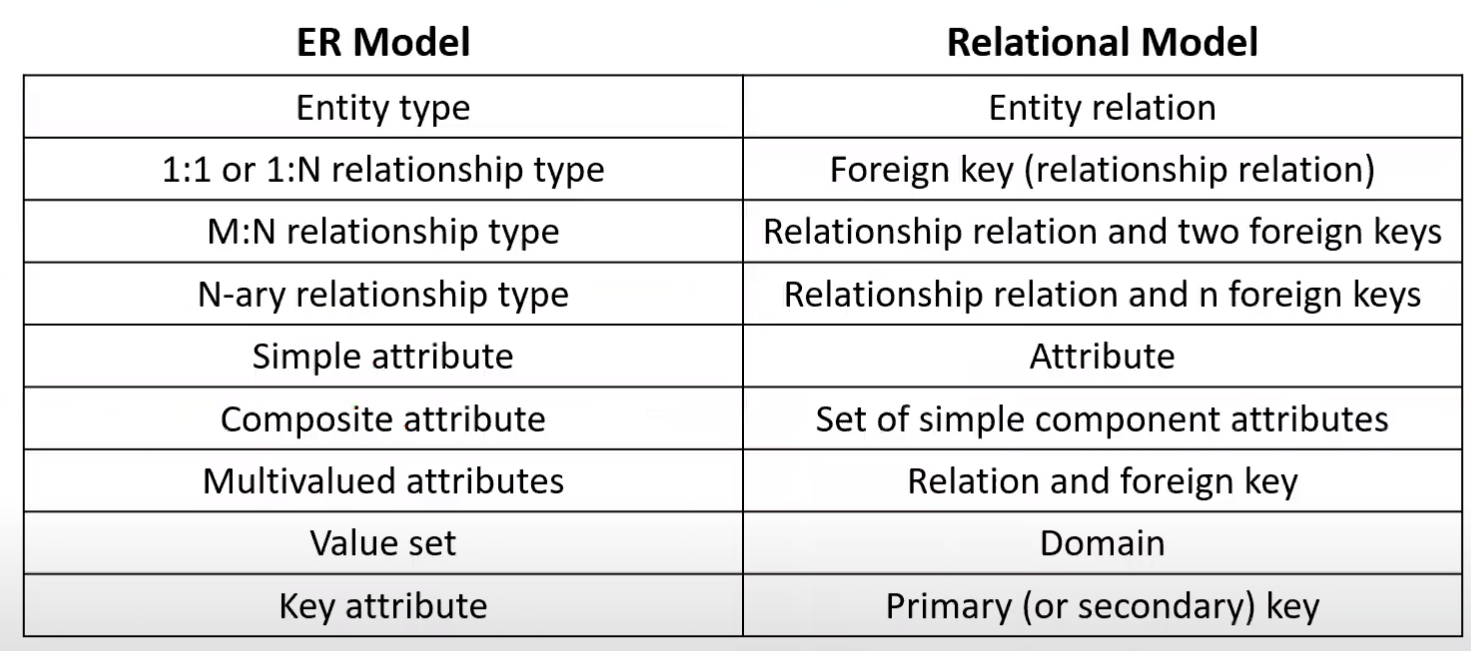

8. Mapping of specializations and generalizations (subclasses and superclasses):
a. Multiple relations for superclass and subclass: relation for superclass with primary key and generalized attributes; multiple relations for subclasses with the primary key of superclass and specialized attributes. This worls for total, partial, disjoint or overlapping.
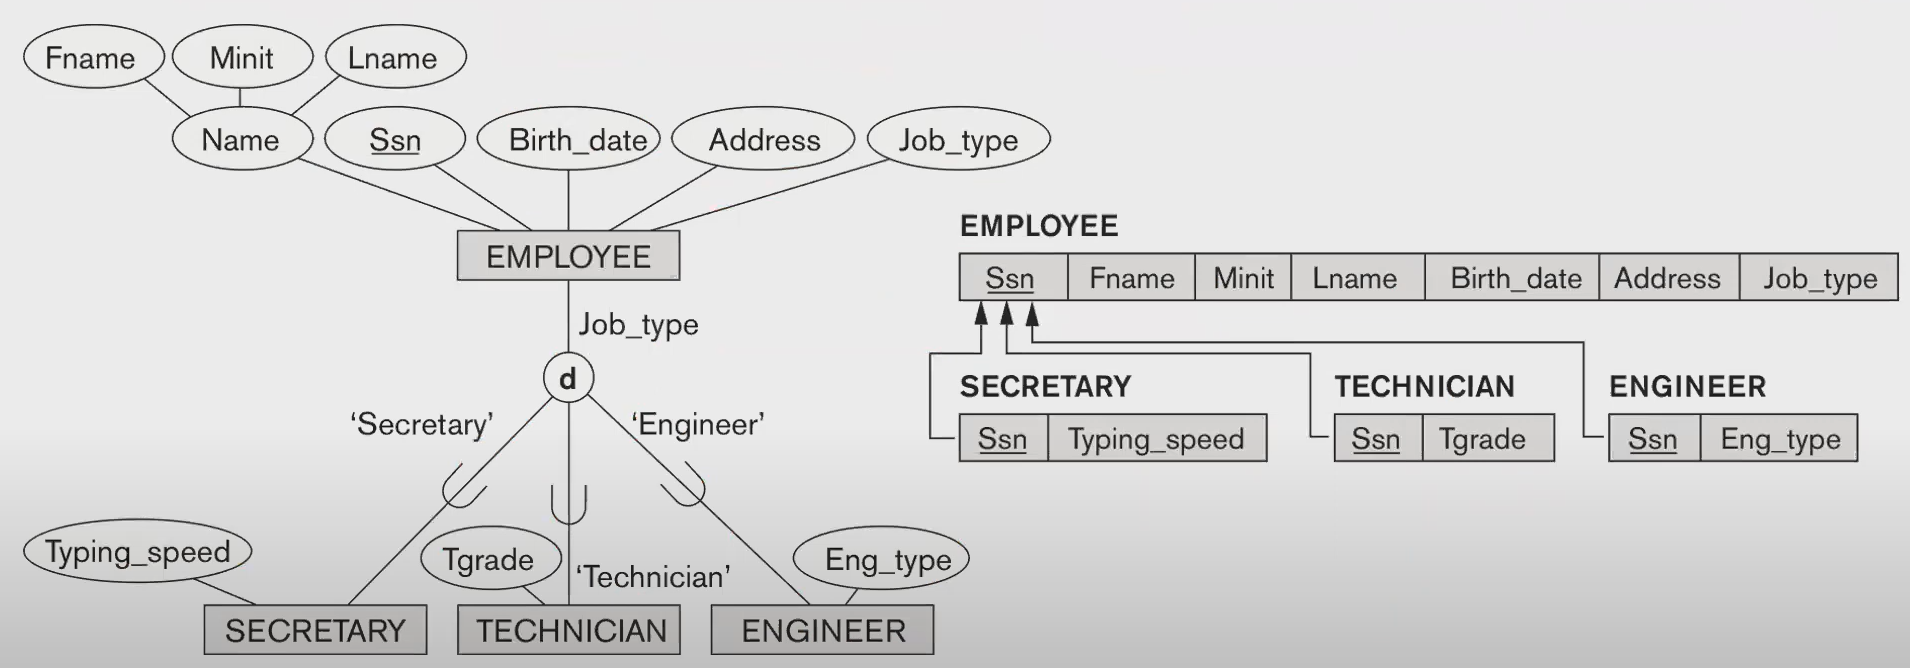

b. Multiple relations - subclass relations only. Create multiple relations for subclasses, with superclass key and attributes for all. Works best for total and disjoint.
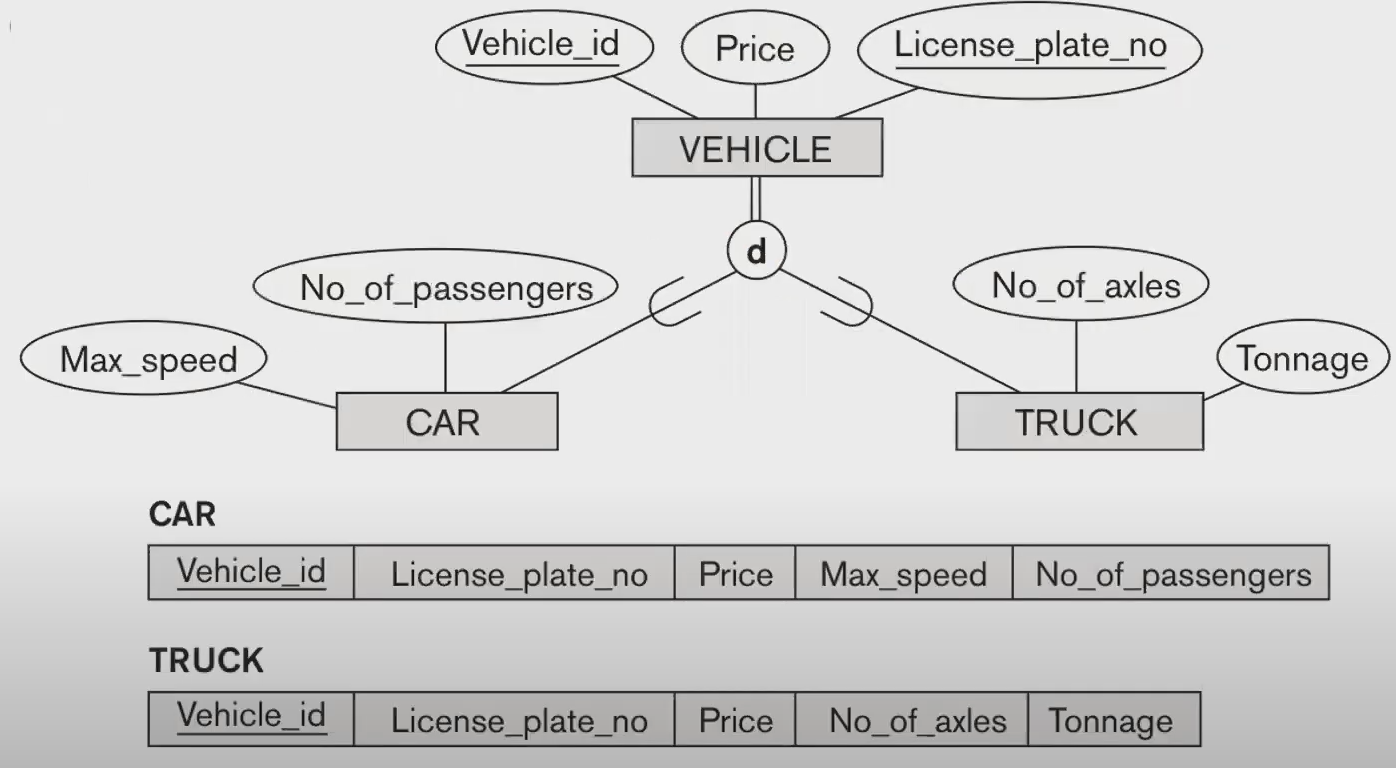

c. Single relation - have all super/subclass attributes in one relation, with a type attribute. Works for disjoint specialization. Since overlapping will have type overlap.
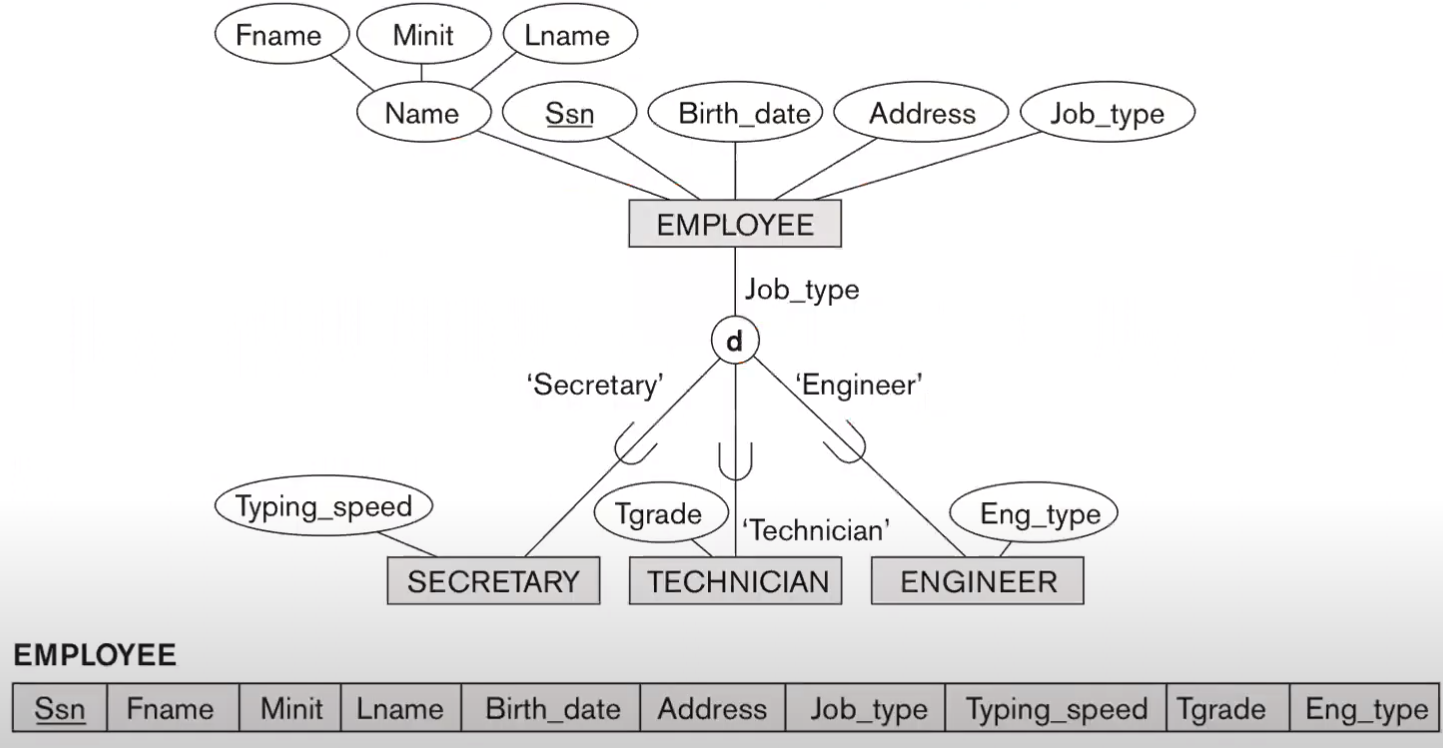

d. Single relation with multiple type: have a Boolean type attribute indicating whether a tuple belongs to subclass. Works for overlapping.

9. Mapping union types: for mapping a category whose defining superclass has different keys, specify a new key attribute called surrogate key.
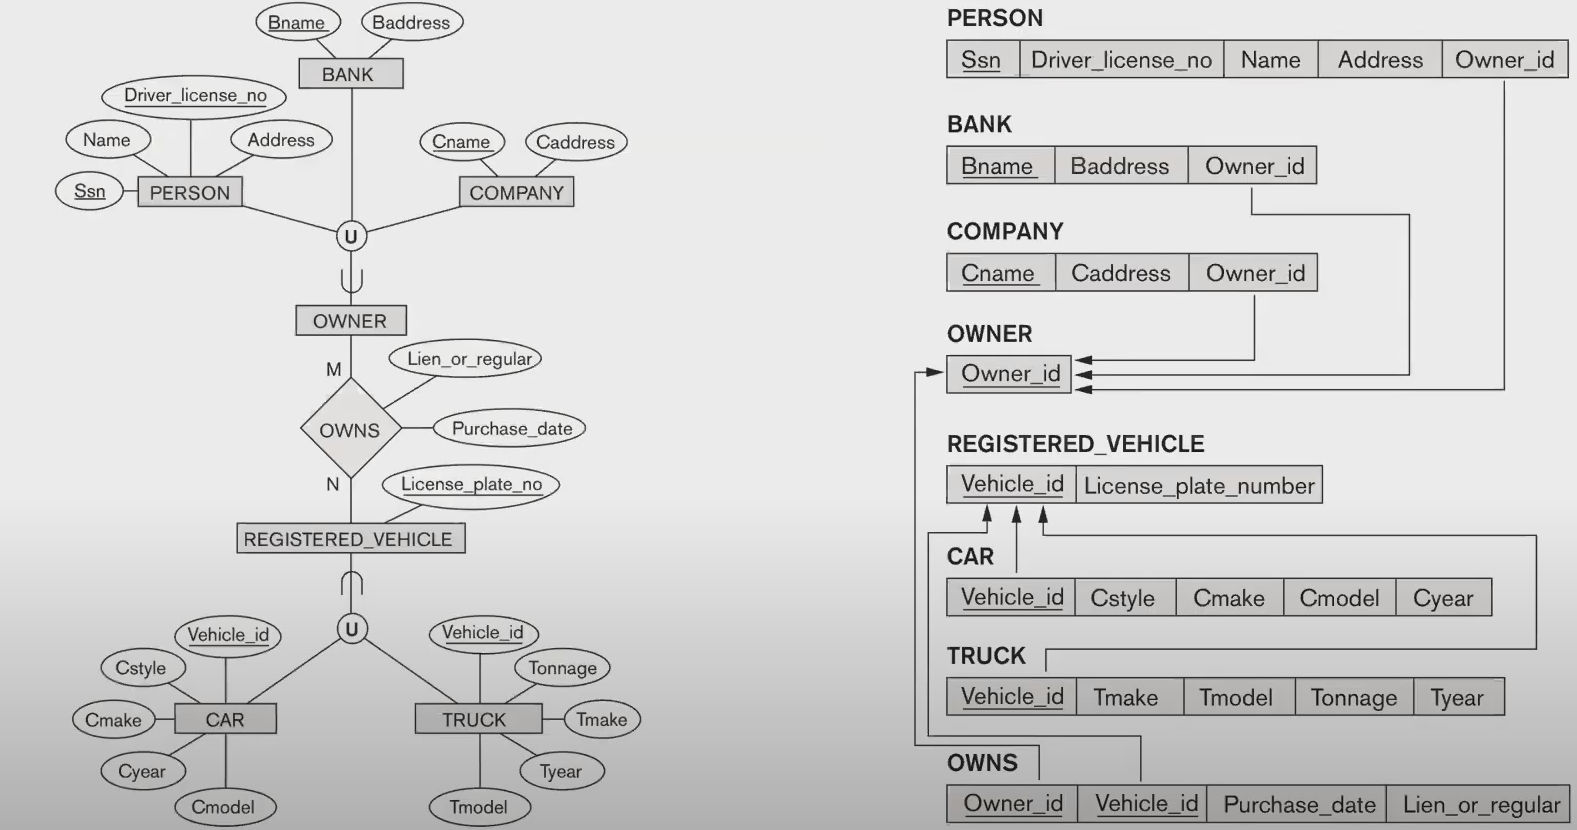
Here, Owner_id is the surrogate key.

## 6: Relational Algebra
Unary relational operation: Select

### Division: R/S=T
Attributes of S are subset of attributes of R. T will be tuples in R present in S.

### Aggregation and Grouping:


## 7: SQL

### DDL CREATE
Allows creation of schema or relation.
CREATE DATABASE company;
CREATE TABLE employee;
Relation has name, attributes, data types, constraints.
Attribute constraints: NOT NULL, DEFAULT, CHECK.
Table constraints: Key, Unique, Referential integrity.
Tuple constraints: CHECK

Violation of referential integrity constraint: reject. Otherwise can be specified to SET NULL/SET DEFAULT/CASCADE.

### DDL ALTER
Add/drop column, changing column definition, add/drop table constraint.

### DDL DROP
Drop named schema elements (tables, domains, constrainst, schema). CASCADE or RESTRICT.

### DML INSERT
Add one/more row or subset of row into relation.

### DML DELETE
Used for removing one/more tuple(s) from relation.

### DML UPDATE
UPDATE as a start, SET for modification, WHERE as condition.

### DML SELECT
SELECT a.attribute1, b.attribute2
FROM table1 a, table2 b
WEHRE a.attribute3 = b.attribute4

/*Query 0. Retrieve birth date and address of the employee(s) whose name is ‘John B. Smith’.*/
SELECT bdate, address
FROM employee
WHERE fname = 'John' AND minit = 'B' AND lname = 'Smith';

/*Query 1. Retrieve name and address of all employees who work for the ‘Research’ department.*/
SELECT fname, lname, address
FROM employee, department
WHERE dname = 'Research' AND dnumber = dno;

SELECT employee.fname, employee.lname, employee.address
FROM employee, department
WHERE department.dname = 'Research' AND department.dnumber = employee.dno;

SELECT e.fname, e.lname, e.address
FROM employee AS e, department AS d
WHERE d.dname = 'Research' AND d.dnumber = e.dno;

/*Query 2. For every project located in ‘Stafford’, list project number, controlling department number, 
and department manager’s last name, address, and birth date.*/
SELECT p.pnumber, p.dnum, e.lname, e.address, e.bdate
FROM project p, department d, employee e
WHERE p.dnum = d.dnumber AND d.mgr_ssn = e.ssn AND p.plocation = 'Stafford';

/* Query 3. For each employee, retrieve employee’s first and last name and first and last name of his or her 
immediate supervisor.*/
SELECT e.fname, e.lname, s.fname, s.lname
FROM employee AS e, employee AS s
WHERE e.super_ssn = s.ssn;

/*Query 4. Select ssns of all employees*/
SELECT ssn
FROM employee;

/*Query 5. Select all combinations of employee ssns and department names in the database.*/
SELECT e.ssn, d.dname
FROM employee e, department d;

/*Query 6. Select all attributes of employees who work in department number 5.*/
SELECT *
FROM employee
WHERE dno = 5;

/*Query 7. Select all the attributes of an employee and the attributes of the department in which he/she works for
every employee of the ‘Research’ department.*/
SELECT *
FROM employee e, department d
WHERE d.dname = 'Research' AND e.dno = d.dnumber;

/*Query 8. CROSS PRODUCT of the employee and department relations.*/
SELECT *
FROM employee, department;

###

### MULTISETS, SETS, SET OPERATIONS
DISTINCT for eliminating duplicates.
UNION, INTERSECT, EXCEPT (eliminates duplicates).
UNION ALL, INTERSECT ALL, EXCEPT ALL (doesn't eliminate duplicates).

/* Query 1 - Retrieve salary of every employee and all distinct salary values.*/
SELECT ALL salary
FROM employee;
SELECT DISTINCT salary
FROM employee;

/* Query 2 - Make a list of all project numbers for projects that involve an employee whose last name is ‘Smith’, 
either as a worker or as a manager of the department that controls the project.*/
(SELECT W.Pno
 FROM WORKS_ON W, EMPLOYEE E
 WHERE W.Essn = E.Ssn AND E.Lname = 'Smith')
UNION
(SELECT P.Pnumber
 FROM PROJECT P, DEPARTMENT D, EMPLOYEE E
 WHERE P.Dnum = D.Dnumber AND D.Mgr_ssn = E.Ssn AND E.Lname = 'Smith');



### PATTERN MATCHING AND ADDITIONAL OPERATORS
LIKE for substring pattern matching. "_" replaces a single character, "%" replaces arbitrary number of characters. Contains Houston in address: "%"Houston"%".
/* Query 3.1 - Retrieve all employees whose address is in Houston, Texas.*/
SELECT fname, minit, lname
FROM employee
WHERE address LIKE '%Houston, TX%';

/* Query 3.2 - Find all employees who were born during the 1970s.*/
SELECT Fname, Lname 
FROM EMPLOYEE 
WHERE bdate LIKE '197%';


Arithmetic operators: +, -, *, /.
/* Query 4 - Show resulting salaries if every employee working on the ‘ProductX’ project is given a 10% raise.*/
SELECT e.fname, e.lname, e.salary * 1.1 AS Increased_sal
FROM project AS p, works_on AS w, employee AS e
WHERE p.pname = 'ProductX' AND p.pnumber = w.pno AND w.essn = e.ssn;

BETWEEN: <= AND >=.
/* Query 5 - Retrieve all employees in department 5 whose salary is between $30,000 and $40,000.*/
SELECT fname, lname
FROM employee
WHERE (salary BETWEEN 30000 AND 40000) AND dno = 5;


ORDER BY: desc/asc order.
/* Query 6 - Retrieve a list of employees and projects they are working on, ordered by department and, 
within each department, ordered alphabetically by last name, then first name.*/
SELECT d.dname, e.lname, e.fname, p.pname
FROM department AS d, employee AS e, works_on AS w, project AS p
WHERE d.dnumber = e.dno AND e.ssn = w.essn AND w.pno = p.pnumber
ORDER BY d.dname, e.lname, e.fname;


### THREE VALUED LOGIC
TRUE, FALSE, NULL.
IS & IS NOT are used for checking NULL.

### NESTED QUERIES
Queries can be nested inside SELECT, FROM or WHERE clauses of other quries. Inner or outer.
/* Query 8 - Make a list of all project numbers for projects that involve an employee whose last name is ‘Smith’, 
either as a worker or as a manager of the department that controls the project.*/
SELECT pnumber
FROM project
WHERE pnumber IN
			(SELECT w.pno
			FROM works_on w, employee e
			WHERE e.lname = 'Smith' AND e.ssn = w.essn)
	OR
	Pnumber IN
			(SELECT p.pnumber
			FROM department d, project p, employee e
			WHERE e.lname = 'Smith' AND e.ssn = d.mgr_ssn AND d.dnumber = p.pnumber);

Correlated nested queries: conditions in the WHERE clause of inner query references some attribute of a relation declared in the outer query.
/* Query 9 - Retrieve name of each employee who has a dependent with the same first name and same sex as the employee.*/
SELECT E.Fname, E.Lname
FROM EMPLOYEE AS E
WHERE E.Ssn IN (SELECT D.Essn
				FROM DEPENDENT AS D
				WHERE E.Fname = D.Dependent_name
				AND E.Sex = D.Sex);

	/* In general, a query written with nested select-from-where blocks and using the = or IN comparison operators can always 
	be expressed as a single block query.*/
	SELECT E.Fname, E.Lname
	FROM EMPLOYEE AS E, DEPENDENT AS D
	WHERE E.Ssn = D.Essn AND E.Sex = D.Sex AND E.Fname = D.Dependent_name;


### EXISTS
Boolean function used in WHERE clause, typically in conjunction with nested query to check whether the result is empty.
/* Query 11 - Alternative to Query 9 (Retrieve name of each employee who has a dependent with the same first name and same sex as the employee.), with EXISTS.*/
SELECT e.fname, e.lname
FROM employee AS e
WHERE EXISTS(SELECT *
			FROM dependent AS d
            WHERE e.ssn = d.essn AND e.fname = d.dependent_name AND e.sex = d.sex);
 
/* Query 12 - Retrieve names of employees who have no dependents.*/
SELECT e.fname, e.lname
FROM employee e
WHERE NOT EXISTS(SELECT *
				FROM dependent d
                WHERE e.ssn = d.essn);

/* Query 13 - List names of managers who have at least one dependent.*/
SELECT *
FROM employee e
WHERE EXISTS(SELECT *
			FROM dependent d
            WHERE e.ssn = d.essn)
		AND
        EXISTS
			(SELECT *
            FROM department d
            WHERE e.ssn = d.mgr_ssn);
 

### EXPLICIT SETS AND RENAMING
Explicit sets of values can be used in WHERE clause.
Enclosed in parenthesis.
/* Query 14 - Retrieve ssns of all employees who work on project number 1, 2, or 3.*/
SELECT DISTINCT w.essn
FROM works_on w
WHERE w.pno IN (1, 2, 3);


As command is used to rename relations/attributes.
/* Query 15 - Retrieve last name of each employee and his or her supervisor while renaming the resulting attribute names
as Employee_name and Supervisor_name.*/
SELECT E.Lname AS Employee_name, S.Lname AS Supervisor_name
FROM EMPLOYEE AS E, EMPLOYEE AS S
WHERE E.Super_ssn = S.Ssn;


### JOINED TABLES

#######
/* Query 18 - For every project located in ‘Stafford’, list project number, controlling department number, 
and department manager’s last name, address, and birth date.*/ 
SELECT P.Pnumber, D.Dnumber, E.Lname, E.Address, E.Bdate
FROM ((PROJECT P JOIN DEPARTMENT D ON P.Dnum = D.Dnumber) JOIN EMPLOYEE E ON D.Mgr_ssn = E.Ssn)
WHERE P.Plocation = 'Stafford';
#######

### AGGREGATE FUNCTIONS
Used to summarise information from multiple tuples into a single-tuple summary. Normally used in SELECT or HAVING clause.
On tuples - COUNT; On attributes - SUM, MAX, MIN, AVG.

#######
USE company;
/* Query 19.1 - Find the sum of salaries of all employees, maximum salary, minimum salary, and average 
salary without attribute renaming.*/ 
SELECT SUM(Salary), MAX(Salary), MIN(Salary), AVG(Salary)
FROM EMPLOYEE;

/* Query 19.2 - Find the sum of salaries of all employees, maximum salary, minimum salary, and average 
salary with attribute renaming.*/
SELECT SUM(Salary) AS Total_Sal, MAX(Salary) AS Highest_Sal, MIN(Salary) AS Lowest_Sal, AVG(Salary) AS Average_Sal
FROM EMPLOYEE;

/* Query 20 - Find the sum of salaries of all employees of the ‘Research’ department, as well as maximum salary,
minimum salary, and average salary in this department.*/
SELECT SUM(E.Salary), MAX(E.Salary), MIN(E.Salary), AVG(E.Salary)
FROM (EMPLOYEE E JOIN DEPARTMENT D ON E.Dno = D.Dnumber)
WHERE D.Dname = 'Research';

/* Query 21 - Count the number of distinct salary values in the database.*/
SELECT COUNT(DISTINCT Salary)
FROM EMPLOYEE;

/* Query 22 - Retrieve names of all employees who have two or more dependents. Uses correlated nested query*/
SELECT E.Lname, E.Fname
FROM EMPLOYEE E
WHERE (SELECT COUNT(*)
	   FROM DEPENDENT D
	   WHERE E.Ssn = D.Essn) >= 2;

#######

### GROUP BY AND HAVING


#######

/* Query 23 - For each department, retrieve department number, number of employees in the department, and their 
average salary.*/
SELECT Dno, COUNT(*), AVG(Salary)
FROM EMPLOYEE
GROUP BY Dno;

/* Query 24 - For each project, retrieve project number, project name, and the number of employees who work on 
that project.*/
SELECT P.Pnumber, P.Pname, COUNT(*)
FROM PROJECT P, WORKS_ON W
WHERE P.Pnumber = W.Pno
GROUP BY P.Pnumber, P.Pname;

/* Query 25 - For each project on which more than two employees work, retrieve project number, project name, and 
the number of employees who work on the project.*/
SELECT P.Pnumber, P.Pname, COUNT(*)
FROM PROJECT P, WORKS_ON W
WHERE P.Pnumber = W.Pno
GROUP BY P.Pnumber, P.Pname
HAVING COUNT(*) > 2;

#######


### SUMMARY